In [2]:
from load_balancing.load_balancing_model import lbm
import load_balancing.jit_functions as efficient
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from copy import copy

import numpy as np
from scipy.interpolate import interp1d


import os 

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
save_to = '../../latex/plots/'
plot_dir = os.path.join(ROOT_DIR, save_to)

# Information

The model specification is needed to rerun all parts of the calculations but may take some time since sample mean, variance, mean field and refined mean field have to be calculated. 

The Figures used can be obtained using saved calculations which are instantly available. In order to do so, simply run the code cells below the figure heading e.g. "Figure 5".

## Specify the Models

In [3]:
# system sizes
nr_items = [10, 20, 30, 40] 

arrival_rate = 1.0

# set server rates 
## uniformly distributed servers
max_server_rate = 1.5
min_server_rate = 1.0
np.random.seed(1)
server_rates = (max_server_rate - min_server_rate) * \
               np.random.random(size=nr_items[-1]) + min_server_rate

# set all servers to one (other option)
# server_rates = np.ones(nr_items[-1])

# set specific server speeds (here 20 percent have value 2 and another 20 percent 0.5)
# for clarification: server_rates[0:10] corresponds to the first 10 servers the servers of the first model of size 10
# server_rates[0:20] to the second model  with size 20, etc.
# server_rates[[0, 5, 10, 15, 20, 25, 30, 35]] = 2
# server_rates[[1, 6, 11, 16, 21, 26, 31, 36]] = 0.5

models = {}
#comparison_models = {}
simulation_steps = {}

# initialize dictionary with models based on the specifications
for n in nr_items:
    _server_rates = server_rates[:n]
    models[n] = lbm(arrival_rate, _server_rates, verbose=True)
    print('')
    average_server_rate = np.sum(server_rates[:n])/n
    #comparison_models[n] = lbm(arrival_rate, np.ones(shape=(n))*average_server_rate, verbose=True)
    if n < 30:
        simulation_steps[n] = 3e3
    elif n >= 30 and n < 50:
        simulation_steps[n] = 5e3
    elif n == 50:
        simulation_steps[n] = 7e3

Initialized model with:
	n=10
	Arrival rate=1.0
Model initial state set to:
	All servers have no jobs (x[:,0]=1).
Arrival Rate (1.0); Average Server Rate (1.16).

Initialized model with:
	n=20
	Arrival rate=1.0
Model initial state set to:
	All servers have no jobs (x[:,0]=1).
Arrival Rate (1.0); Average Server Rate (1.18).

Initialized model with:
	n=30
	Arrival rate=1.0
Model initial state set to:
	All servers have no jobs (x[:,0]=1).
Arrival Rate (1.0); Average Server Rate (1.22).

Initialized model with:
	n=40
	Arrival rate=1.0
Model initial state set to:
	All servers have no jobs (x[:,0]=1).
Arrival Rate (1.0); Average Server Rate (1.23).



In [4]:
# # system sizes

# N = 10 
# nr_items = [N] 

# gamma = 0.01
# alpha = 0.05
# arrival_rate = 1.0 - gamma/(N**alpha)

# # set server rates 
# ## uniformly distributed servers
# max_server_rate = 1.0
# min_server_rate = 1.0
# # np.random.seed(1)
# server_rates = (max_server_rate - min_server_rate) * \
#                np.random.random(size=nr_items[-1]) + min_server_rate

# # set all servers to one (other option)
# # server_rates = np.ones(nr_items[-1])

# # set specific server speeds (here 20 percent have value 2 and another 20 percent 0.5)
# # for clarification: server_rates[0:10] corresponds to the first 10 servers the servers of the first model of size 10
# # server_rates[0:20] to the second model  with size 20, etc.
# # server_rates[[0, 5, 10, 15, 20, 25, 30, 35]] = 2
# # server_rates[[1, 6, 11, 16, 21, 26, 31, 36]] = 0.5

# models = {}
# comparison_models = {}
# simulation_steps = {}

# # initialize dictionary with models based on the specifications
# for n in [N]:
#     _server_rates = server_rates[:n]
#     model = lbm(arrival_rate, _server_rates, verbose=True)
#     print('')
#     if n < 30:
#         simulation_steps[n] = 1e8
#     elif n >= 30 and n < 50:
#         simulation_steps[n] = 5e3
#     elif n == 50:
#         simulation_steps[n] = 7e3

# t, X = model.efficient_simulation(steps=1e8)

In [5]:
# from load_balancing.run_simulations import run_simu_all_states, run_simu_average_queue, run_simu_density_representation

###  Running and saving the simulations (can also be done in with the file 'run_simulations.py'  and is probably a bit faster) 
## The functions calculate the sample mean and variance of the system
The save_name is used to uniquely save the values of the setup and should be changed for differing server rates.

In [6]:
# run_simu_all_states(models, nr_simulations=1, nr_steps=simulation_steps, save_name="paper_verification")

# Figure 5

In [7]:
def calculate_avg_len_values(save_file=''):
    avg_queue_len_sim = {}
    avg_queue_len_mf = {}
    avg_queue_len_rmf = {}
    avg_queue_len_steady_mf = {}
    avg_queue_len_steady_rmf = {}
    avg_queue_len_steady_simu = {}
    avg_queue_len_conf = {}

    steady_state_prob_all_mf = np.load("saves/" + save_file + "steady_state_prob_all_mf.npy", allow_pickle=True)[()]
    steady_state_prob_all_rmf = np.load("saves/" + save_file + "steady_state_prob_all_rmf.npy", allow_pickle=True)[()]
    steady_state_prob_all_simu = np.load("saves/" + save_file + "steady_state_prob_all_simu.npy", allow_pickle=True)[()]

    many_sim_mean = np.load("saves/" + save_file + "many_sim_mean_avg_len.npy", allow_pickle=True)[()]
    many_sim_T = np.load("saves/" + save_file + "many_sim_T_avg_len.npy", allow_pickle=True)[()]
    many_sim_err1 = np.load("saves/" + save_file + "many_sim_err1_avg_len.npy", allow_pickle=True)[()]
    many_sim_err2 = np.load("saves/" + save_file + "many_sim_err2_avg_len.npy", allow_pickle=True)[()]

    trans_state_X = np.load("saves/" + save_file + "trans_state_X.npy", allow_pickle=True)[()]
    trans_state_XV = np.load("saves/" + save_file + "trans_state_XV.npy", allow_pickle=True)[()]
    trans_state_T = np.load("saves/" + save_file + "trans_state_T.npy", allow_pickle=True)[()]

    nr_items = [10,20,30,40]

    t_min = 20
    t_max = 75
    for n in nr_items:
        _interpolation = interp1d(many_sim_T[n], many_sim_mean[n], axis = 0)
        if n < 30:
            _interpolation_conf = interp1d(many_sim_T[n], 2*np.sqrt(many_sim_err2[n]) / np.sqrt(2000), axis=0)

        elif n < 50:
            _interpolation_conf = interp1d(many_sim_T[n], 2*np.sqrt(many_sim_err2[n]) / np.sqrt(3000), axis=0)


        avg_queue_len_sim[n] = []
        avg_queue_len_mf[n] = []
        avg_queue_len_rmf[n] = []
        avg_queue_len_steady_mf[n] = []
        avg_queue_len_steady_rmf[n] = []
        avg_queue_len_steady_simu[n] = []
        avg_queue_len_conf[n] = []

        #lower = many_sim_mean[n][:, :] - 2*np.sqrt(many_sim_err2[n][:, :]) / np.sqrt(1000)
        #upper = many_sim_mean[n][:, :] + 2*np.sqrt(many_sim_err2[n][:, :]) / np.sqrt(1000)
        #upper_avg_len = np.dot(upper, np.arange(0,16).transpose())
        #lower_avg_len = np.dot(lower, np.arange(0,16).transpose())

        for i, t in enumerate(trans_state_T[n]):
            if t <= many_sim_T[n][-1] and t <= t_max and t >= t_min:
                q_lengths = np.arange(0, trans_state_X[n][0].shape[0])
                avg_queue_len_sim[n].append(np.sum(_interpolation(t)))

                #avg_queue_len_conf[n].append(np.sum(_interpolation_conf(t)*np.array([1]*16)))
                avg_queue_len_conf[n].append(np.sum(_interpolation_conf(t)))

                avg_queue_len_mf[n].append(np.sum(trans_state_X[n][i]*q_lengths))
                avg_queue_len_rmf[n].append(np.sum(trans_state_XV[n][i]*q_lengths))
                i_max = i+1
            elif t <= t_min:
                i_min = i +1
        avg_queue_len_steady_mf[n].append(np.sum(steady_state_prob_all_mf[n]*q_lengths))
        avg_queue_len_steady_rmf[n].append(np.sum(steady_state_prob_all_rmf[n]*q_lengths))
        max_len = min(steady_state_prob_all_simu[n].shape[0], 16)
        avg_queue_len_steady_simu[n].append(np.sum(steady_state_prob_all_simu[n][:max_len]*q_lengths[:max_len]))
    return avg_queue_len_sim, avg_queue_len_mf, avg_queue_len_rmf, avg_queue_len_steady_mf, avg_queue_len_steady_rmf, avg_queue_len_steady_simu, avg_queue_len_conf, trans_state_T, i_min, i_max, nr_items
    

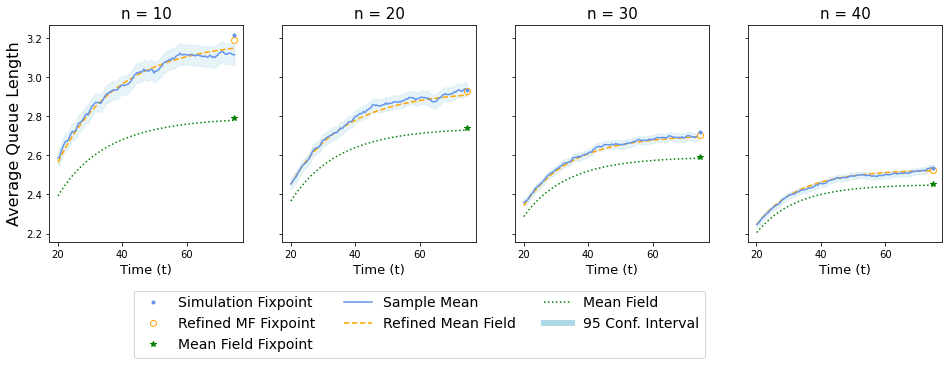

In [8]:
# load values
avg_queue_len_sim, avg_queue_len_mf, avg_queue_len_rmf, avg_queue_len_steady_mf, avg_queue_len_steady_rmf, \
avg_queue_len_steady_simu, avg_queue_len_conf, trans_state_T, i_min, i_max, nr_items = calculate_avg_len_values(save_file='')
    
start_time = 20
        
f, subplot_list = plt.subplots(1, 4, sharey=True)
subplot_list = subplot_list.flatten()
f.set_figwidth(16)
f.set_figheight(4)

show_indices = [0,2,4,5]
# plot_for_n = [nr_items[i] for i in show_indices]
plot_for_n = nr_items
colors = ['#d7191c','#fdae61','#abd9e9','#2c7bb6']


for i, ax in enumerate(subplot_list):
    n = plot_for_n[i]
    ax.plot(trans_state_T[n][i_min:i_max], np.array(avg_queue_len_mf[n]), ':', label='MF', color="green")
    ax.plot(trans_state_T[n][i_min:i_max], np.array(avg_queue_len_rmf[n]), "--",label='RMF', color="orange")
    ax.plot(trans_state_T[n][i_min:i_max], avg_queue_len_sim[n], label="SIM", color="cornflowerblue")
    ax.plot(trans_state_T[n][i_max-1], avg_queue_len_steady_mf[n], '*', color="green")
    ax.plot(trans_state_T[n][i_max-1], avg_queue_len_steady_rmf[n], 'o', color="orange", markerfacecolor='w')
    ax.plot(trans_state_T[n][i_max-1], avg_queue_len_steady_simu[n], '.', color="cornflowerblue")
    conf = np.array(avg_queue_len_conf[n])
    ax.fill_between(trans_state_T[n][i_min:i_max], np.array(avg_queue_len_sim[n]) - conf, 
                    np.array(avg_queue_len_sim[n]) + conf, alpha=0.3, color="lightblue")
    
     
    
    ax.set_xlabel("Time (t)", fontsize=13)
    if i == 0:
        ax.set_ylabel("Average Queue Length", fontsize=16)
    
    # ax.set_xlim(30)
    #ax.legend(loc='lower right', ncol = 2)
    ax.set_title("n = " + str(n), fontsize=15)
    #color_for_n[n] = colors[-1]
    colors = colors[:-1]
    
from matplotlib.lines import Line2D
steady_state_marker = ['.', '*']
line_styles = ['-', ':']
custom_legend_lines = []
# custom_legend_lines = [Line2D([0], [0], color=color_for_n[n], lw=4) for n in plot_for_n]
custom_legend_lines += [Line2D([0], [0], linestyle='-', label="Simulation Fixpoint", marker='.', markeredgecolor='cornflowerblue', color='w', markerfacecolor='cornflowerblue')]
custom_legend_lines += [Line2D([0], [0], linestyle='--', label="Refined MF Fixpoint", marker='o', markeredgecolor='orange', color='w', markerfacecolor='w')]
custom_legend_lines += [Line2D([0], [0], linestyle=':', label="Mean Field Fixpoint", marker='*', markeredgecolor='green', color='w', markerfacecolor='green')]

custom_legend_lines += [Line2D([0], [0], linestyle='-', label="Sample Mean", color='cornflowerblue')]
custom_legend_lines += [Line2D([0], [0], linestyle='--', label="Refined Mean Field", color='orange')]
custom_legend_lines += [Line2D([0], [0], linestyle=':', label="Mean Field", color='green')]
custom_legend_lines += [Line2D([0], [0], label="95 Conf. Interval", color="lightblue",lw=6)]


f.legend(handles=custom_legend_lines, loc="lower right",fontsize=14, ncol=3, bbox_to_anchor=(0.7, -0.3))


plt.savefig(os.path.join(plot_dir, 'average_queue_len.pdf'), bbox_inches='tight')
plt.show()

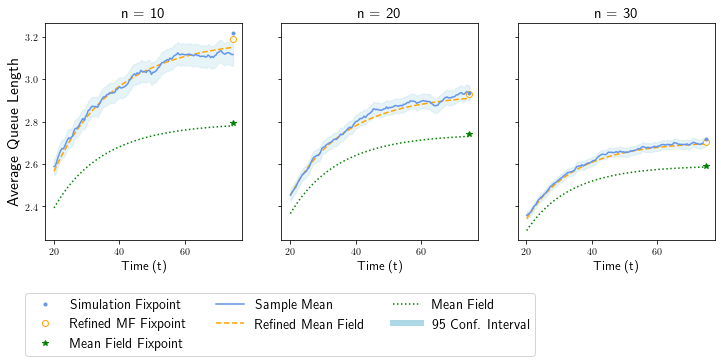

In [24]:
# load values
avg_queue_len_sim, avg_queue_len_mf, avg_queue_len_rmf, avg_queue_len_steady_mf, avg_queue_len_steady_rmf, \
avg_queue_len_steady_simu, avg_queue_len_conf, trans_state_T, i_min, i_max, nr_items = calculate_avg_len_values(save_file='')
    
start_time = 20
        
f, subplot_list = plt.subplots(1, 3, sharey=True)
subplot_list = subplot_list.flatten()
f.set_figwidth(12)
f.set_figheight(4)

show_indices = [0,2,4] #,5]
# plot_for_n = [nr_items[i] for i in show_indices]
plot_for_n = nr_items[:-1]
colors = ['#d7191c','#fdae61','#abd9e9','#2c7bb6']


for i, ax in enumerate(subplot_list):
    n = plot_for_n[i]
    ax.plot(trans_state_T[n][i_min:i_max], np.array(avg_queue_len_mf[n]), ':', label='MF', color="green")
    ax.plot(trans_state_T[n][i_min:i_max], np.array(avg_queue_len_rmf[n]), "--",label='RMF', color="orange")
    ax.plot(trans_state_T[n][i_min:i_max], avg_queue_len_sim[n], label="SIM", color="cornflowerblue")
    ax.plot(trans_state_T[n][i_max-1], avg_queue_len_steady_mf[n], '*', color="green")
    ax.plot(trans_state_T[n][i_max-1], avg_queue_len_steady_rmf[n], 'o', color="orange", markerfacecolor='w')
    ax.plot(trans_state_T[n][i_max-1], avg_queue_len_steady_simu[n], '.', color="cornflowerblue")
    conf = np.array(avg_queue_len_conf[n])
    ax.fill_between(trans_state_T[n][i_min:i_max], np.array(avg_queue_len_sim[n]) - conf, 
                    np.array(avg_queue_len_sim[n]) + conf, alpha=0.3, color="lightblue")
    
     
    
    ax.set_xlabel("Time (t)", fontsize=13)
    if i == 0:
        ax.set_ylabel("Average Queue Length", fontsize=16)
    
    # ax.set_xlim(30)
    #ax.legend(loc='lower right', ncol = 2)
    ax.set_title("n = " + str(n), fontsize=15)
    #color_for_n[n] = colors[-1]
    colors = colors[:-1]
    
from matplotlib.lines import Line2D
steady_state_marker = ['.', '*']
line_styles = ['-', ':']
custom_legend_lines = []
# custom_legend_lines = [Line2D([0], [0], color=color_for_n[n], lw=4) for n in plot_for_n]
custom_legend_lines += [Line2D([0], [0], linestyle='-', label="Simulation Fixpoint", marker='.', markeredgecolor='cornflowerblue', color='w', markerfacecolor='cornflowerblue')]
custom_legend_lines += [Line2D([0], [0], linestyle='--', label="Refined MF Fixpoint", marker='o', markeredgecolor='orange', color='w', markerfacecolor='w')]
custom_legend_lines += [Line2D([0], [0], linestyle=':', label="Mean Field Fixpoint", marker='*', markeredgecolor='green', color='w', markerfacecolor='green')]

custom_legend_lines += [Line2D([0], [0], linestyle='-', label="Sample Mean", color='cornflowerblue')]
custom_legend_lines += [Line2D([0], [0], linestyle='--', label="Refined Mean Field", color='orange')]
custom_legend_lines += [Line2D([0], [0], linestyle=':', label="Mean Field", color='green')]
custom_legend_lines += [Line2D([0], [0], label="95 Conf. Interval", color="lightblue",lw=6)]


f.legend(handles=custom_legend_lines, loc="lower right",fontsize=14, ncol=3, bbox_to_anchor=(0.7, -0.3))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.savefig(os.path.join(plot_dir, 'average_queue_len_abstract.pdf'), bbox_inches='tight')
plt.show()

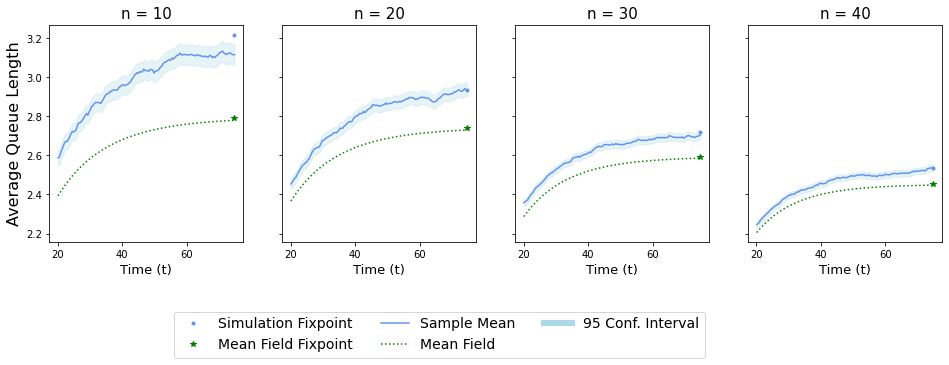

In [9]:
# load values
avg_queue_len_sim, avg_queue_len_mf, avg_queue_len_rmf, avg_queue_len_steady_mf, avg_queue_len_steady_rmf, \
avg_queue_len_steady_simu, avg_queue_len_conf, trans_state_T, i_min, i_max, nr_items = calculate_avg_len_values(save_file='')
    
start_time = 20
        
f, subplot_list = plt.subplots(1, 4, sharey=True)
subplot_list = subplot_list.flatten()
f.set_figwidth(16)
f.set_figheight(4)

show_indices = [0,2,4,5]
# plot_for_n = [nr_items[i] for i in show_indices]
plot_for_n = nr_items
colors = ['#d7191c','#fdae61','#abd9e9','#2c7bb6']


for i, ax in enumerate(subplot_list):
    n = plot_for_n[i]
    ax.plot(trans_state_T[n][i_min:i_max], np.array(avg_queue_len_mf[n]), ':', label='MF', color="green")
    # ax.plot(trans_state_T[n][i_min:i_max], np.array(avg_queue_len_rmf[n]), "--",label='RMF', color="orange")
    ax.plot(trans_state_T[n][i_min:i_max], avg_queue_len_sim[n], label="SIM", color="cornflowerblue")
    ax.plot(trans_state_T[n][i_max-1], avg_queue_len_steady_mf[n], '*', color="green")
    # ax.plot(trans_state_T[n][i_max-1], avg_queue_len_steady_rmf[n], 'o', color="orange", markerfacecolor='w')
    ax.plot(trans_state_T[n][i_max-1], avg_queue_len_steady_simu[n], '.', color="cornflowerblue")
    conf = np.array(avg_queue_len_conf[n])
    ax.fill_between(trans_state_T[n][i_min:i_max], np.array(avg_queue_len_sim[n]) - conf, 
                    np.array(avg_queue_len_sim[n]) + conf, alpha=0.3, color="lightblue")
    
     
    
    ax.set_xlabel("Time (t)", fontsize=13)
    if i == 0:
        ax.set_ylabel("Average Queue Length", fontsize=16)
    
    # ax.set_xlim(30)
    #ax.legend(loc='lower right', ncol = 2)
    ax.set_title("n = " + str(n), fontsize=15)
    #color_for_n[n] = colors[-1]
    colors = colors[:-1]
    
from matplotlib.lines import Line2D
steady_state_marker = ['.', '*']
line_styles = ['-', ':']
custom_legend_lines = []
# custom_legend_lines = [Line2D([0], [0], color=color_for_n[n], lw=4) for n in plot_for_n]
custom_legend_lines += [Line2D([0], [0], linestyle='-', label="Simulation Fixpoint", marker='.', markeredgecolor='cornflowerblue', color='w', markerfacecolor='cornflowerblue')]
#custom_legend_lines += [Line2D([0], [0], linestyle='--', label="Refined MF Fixpoint", marker='o', markeredgecolor='orange', color='w', markerfacecolor='w')]
custom_legend_lines += [Line2D([0], [0], linestyle=':', label="Mean Field Fixpoint", marker='*', markeredgecolor='green', color='w', markerfacecolor='green')]

custom_legend_lines += [Line2D([0], [0], linestyle='-', label="Sample Mean", color='cornflowerblue')]
#custom_legend_lines += [Line2D([0], [0], linestyle='--', label="Refined Mean Field", color='orange')]
custom_legend_lines += [Line2D([0], [0], linestyle=':', label="Mean Field", color='green')]
custom_legend_lines += [Line2D([0], [0], label="95 Conf. Interval", color="lightblue",lw=6)]


f.legend(handles=custom_legend_lines, loc="lower right",fontsize=14, ncol=3, bbox_to_anchor=(0.7, -0.3))


plt.savefig(os.path.join(plot_dir, 'average_queue_len_mf.pdf'), bbox_inches='tight')
plt.show()

# Figure 7

In [10]:
def calculate_tail_values_from_saves(save_file=''):
    steady_state_prob_all_mf = np.load("saves/" + save_file + "steady_state_prob_all_mf.npy", allow_pickle=True)[()]
    steady_state_prob_all_rmf = np.load("saves/" + save_file + "steady_state_prob_all_rmf.npy", allow_pickle=True)[()]
    steady_state_prob_all_simu = np.load("saves/" + save_file + "steady_state_prob_all_simu.npy", allow_pickle=True)[()]

    data_sim = {}
    data_mf = {}
    data_rmf = {}


    threshold = 0
    for n in steady_state_prob_all_simu.keys():
        prob_simu = steady_state_prob_all_simu[n][threshold:].sum()
        prob_mf = steady_state_prob_all_mf[n][threshold:].sum()
        prob_rmf = steady_state_prob_all_rmf[n][threshold:].sum()


        data_sim[n] = []
        data_mf[n] = []
        data_rmf[n] = []
        for k in range(threshold, 10):
            prob_simu = steady_state_prob_all_simu[n][k:].sum()
            prob_mf = steady_state_prob_all_mf[n][k:].sum()
            prob_rmf = steady_state_prob_all_rmf[n][k:].sum()

            data_sim[n].append(prob_simu)
            data_mf[n].append(prob_mf)
            data_rmf[n].append(prob_rmf)
            
    return data_sim, data_mf, data_rmf, prob_simu, prob_mf, prob_rmf

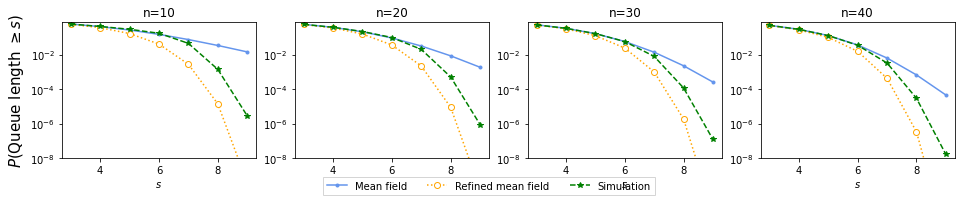

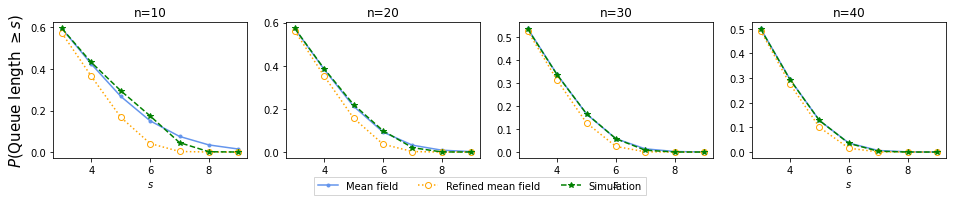

In [11]:
data_sim, data_mf, data_rmf, prob_simu, prob_mf, prob_rmf = calculate_tail_values_from_saves(save_file='')

colors = ['cornflowerblue','orange','green']

show_indices = [0,1,2,3]
plot_for_n = [nr_items[i] for i in show_indices]

for log_scale in [True, False]:

    fig, subplot_list = plt.subplots(1, 4, sharey=False)
    subplot_list = subplot_list.flatten()

    fig.set_size_inches(16, 2.5)

    for k, ax in enumerate(subplot_list):
        if k==0:
            ax.set_ylabel(r"$P($Queue length $\geq s)$", fontsize=15)

        n = plot_for_n[k]
        prob_sim = []
        prob_mf  = []
        prob_rmf = []
        for i in range(3,10,1):
            prob_sim.append(data_sim[n][i])
            prob_mf.append(data_mf[n][i])
            prob_rmf.append(data_rmf[n][i])
        ax.plot(range(3,10,1), prob_sim, '.-', label="SIM  "+str(n), color=colors[0])
        ax.plot(range(3,10,1), prob_mf, 'o:', label="MF   "+str(n), color=colors[1], markerfacecolor='w')
        ax.plot(range(3,10,1), prob_rmf, '*--', label="RMF "+str(n), color=colors[2])
        ax.set_xlabel(r"$s$", fontsize=10)
        ax.set_title('n={}'.format(n))
        if log_scale:
            ax.set_ylim([1e-8, 0.75])
            ax.semilogy()
#        else:
#            ax.set_ylim([1e-8, 0.75])
            
    legends = ['Mean field', 'Refined mean field', 'Simulation']
    subplot_list[1].legend(labels=legends,loc='upper center', 
         bbox_to_anchor=(1, -0.1),fancybox=False, shadow=False, ncol=4)

    # plt.xlabel("k")

    plt.savefig(os.path.join(plot_dir, 'tail_distribution{}.pdf'.format('_log' if log_scale else '')), bbox_inches='tight')

# Figure 6

In [12]:
def calculate_steady_state_errors(save_file=''):
    # loading values
    comp_steady_state_prob_all_mf = np.load("saves/" + save_file + "comp_steady_state_prob_all_mf.npy", allow_pickle=True)[()]
    comp_steady_state_prob_all_rmf = np.load("saves/" + save_file + "comp_steady_state_prob_all_rmf.npy", allow_pickle=True)[()]

    steady_state_prob_all_mf = np.load("saves/" + save_file + "steady_state_prob_all_mf.npy", allow_pickle=True)[()]
    steady_state_prob_all_rmf = np.load("saves/" + save_file + "steady_state_prob_all_rmf.npy", allow_pickle=True)[()]
    steady_state_prob_all_simu = np.load("saves/" + save_file + "steady_state_prob_all_simu.npy", allow_pickle=True)[()]

    comp_mf_values = []
    comp_rmf_values = []
    mf_values = []
    rmf_values = []

    nr_items = list(comp_steady_state_prob_all_mf.keys())
    
    nr_items.sort()


    for n in nr_items:
        max_len = min(steady_state_prob_all_simu[n].shape[0], 16)
        # calc summed error
        comp_mf_values += [sum(np.abs(steady_state_prob_all_simu[n][0:max_len] - comp_steady_state_prob_all_mf[n][0:max_len]))]
        comp_rmf_values += [sum(np.abs(steady_state_prob_all_simu[n][0:max_len] - comp_steady_state_prob_all_rmf[n][0:max_len]))]

        mf_values += [sum(np.abs(steady_state_prob_all_simu[n][0:max_len] - steady_state_prob_all_mf[n][0:max_len]))]
        rmf_values += [sum(np.abs(steady_state_prob_all_simu[n][0:max_len] - steady_state_prob_all_rmf[n][0:max_len]))]
        
        # max error
        # comp_mf_values += [np.abs(steady_state_prob_all_simu[n][0:max_len] - comp_steady_state_prob_all_mf[n][0:max_len]).max()]
        # comp_rmf_values += [np.abs(steady_state_prob_all_simu[n][0:max_len] - comp_steady_state_prob_all_rmf[n][0:max_len]).max()]
        
        # mf_values += [np.abs(steady_state_prob_all_simu[n][0:max_len] - steady_state_prob_all_mf[n][0:max_len]).max()]
        # rmf_values += [np.abs(steady_state_prob_all_simu[n][0:max_len] - steady_state_prob_all_rmf[n][0:max_len]).max()]
    
        
    return mf_values, rmf_values, comp_mf_values, comp_rmf_values, nr_items

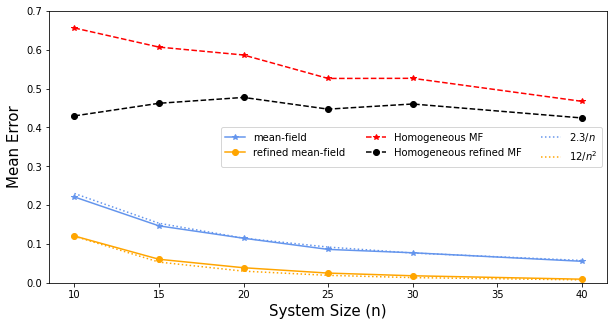

In [13]:
mf_values, rmf_values, comp_mf_values, comp_rmf_values, nr_items = calculate_steady_state_errors(save_file='')
    
f1 = plt.figure()
f1.set_size_inches(10,5) 

colors = ['cornflowerblue','orange','red','black']
    
plt.plot(nr_items, mf_values, '*-', label='mean-field', color=colors[0])
plt.plot(nr_items, rmf_values, 'o-', label='refined mean-field',  color=colors[1])

    
plt.plot(nr_items, comp_mf_values, '*--', label='Homogeneous MF', color=colors[2])
plt.plot(nr_items, comp_rmf_values, 'o--', label='Homogeneous refined MF',  color=colors[3])
#plt.plot([5,45],[0,0],'k-', alpha=0.2)
#plt.xlim([9,41])
plt.ylim([0,0.7])
#plt.title(r"$\frac{1}{n} \sum_{i,s} |E[X_{i,s}] - x_{i,s}|; \ \frac{1}{n} \sum_{i,s} E[X_{i,s}] - x_{i,s} -v_{i,s}$")
compare_list_mf = []
compare_list_rmf = []

for i in nr_items:
    compare_list_mf.append(2.3/i)
    compare_list_rmf.append(12/i**2)
    
plt.plot(nr_items, compare_list_mf, ':', color=colors[0],label=r"$2.3/n$")
plt.plot(nr_items, compare_list_rmf, ':', color=colors[1], label=r"$12/n^2$")

plt.legend(ncol=3)
plt.xlabel("System Size (n)", fontsize=15)
plt.ylabel(r"Mean Error", fontsize=15)
plt.savefig(os.path.join(plot_dir, 'average_error_comparison.pdf'), bbox_inches='tight')
plt.show()

## Plot for uniform servers between 1.0 and 1.5

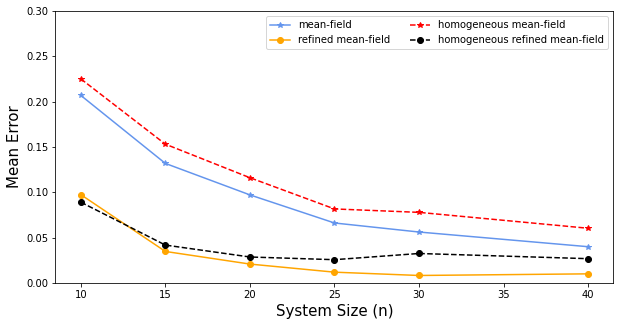

In [14]:
mf_values, rmf_values, comp_mf_values, comp_rmf_values, \
nr_items = calculate_steady_state_errors(save_file='uniform_servers')
    
f1 = plt.figure()
f1.set_size_inches(10,5) 


colors = ['cornflowerblue','orange','red','black']
    
plt.plot(nr_items, mf_values, '*-', label='mean-field', color=colors[0])
plt.plot(nr_items, rmf_values, 'o-', label='refined mean-field',  color=colors[1])

    
plt.plot(nr_items, comp_mf_values, '*--', label='homogeneous mean-field', color=colors[2])
plt.plot(nr_items, comp_rmf_values, 'o--', label='homogeneous refined mean-field',  color=colors[3])
#plt.plot([5,45],[0,0],'k-', alpha=0.2)
#plt.xlim([9,41])
plt.ylim([0,0.3])
#plt.title(r"$\frac{1}{n} \sum_{i,s} |E[X_{i,s}] - x_{i,s}|; \ \frac{1}{n} \sum_{i,s} E[X_{i,s}] - x_{i,s} -v_{i,s}$")
compare_list_mf = []
compare_list_rmf = []

for i in nr_items:
    compare_list_mf.append(2.3/i)
    compare_list_rmf.append(12/i**2)

# plt.plot(nr_items, compare_list_mf, ':', color=colors[0],label=r"$2.3/n$")
# plt.plot(nr_items, compare_list_rmf, ':', color=colors[1], label=r"$12/n^2$")

plt.legend(ncol=2)
plt.xlabel("System Size (n)", fontsize=15)
plt.ylabel(r"Mean Error", fontsize=15)
plt.savefig(os.path.join(plot_dir, 'average_error_comparison_uniform.pdf'), bbox_inches='tight')
plt.show()

# Calculations for servers with unifrom rates between 1.0 and 1.5
The simulations should be run in the file 'run_approximations.py'

## To run alternative specifications change the server properties below and uncomment the last cell

In [15]:
## specify models

# system sizes
nr_items = [10, 15, 20, 25, 30, 40] 

arrival_rate = 1.0

# set server rates 
## uniformly distributed servers
max_server_rate = 1.5
min_server_rate = 1.0

np.random.seed(1)
server_rates = (max_server_rate - min_server_rate) * \
               np.random.random(size=nr_items[-1]) + min_server_rate

# set all servers to one (other option)
# server_rates = np.ones(nr_items[-1])

# set specific server speeds (here 20 percent have value 2 and another 20 percent 0.5)
# for clarification: server_rates[0:10] corresponds to the first 10 servers the servers of the first model of size 10
# server_rates[0:20] to the second model  with size 20, etc.
# server_rates[[0, 5, 10, 15, 20, 25, 30, 35]] = 2
# server_rates[[1, 6, 11, 16, 21, 26, 31, 36]] = 0.5

models = {}
comparison_models = {}
simulation_steps = {}

# initialize dictionary with models based on the specifications
for n in nr_items:
    _server_rates = server_rates[:n]
    models[n] = lbm(arrival_rate, _server_rates, verbose=True)
    print('')
    average_server_rate = np.sum(server_rates[:n])
    comparison_models[n] = lbm(arrival_rate, np.ones(shape=(n))*average_server_rate, verbose=True)
    if n < 30:
        simulation_steps[n] = 3e3
    elif n >= 30 and n < 50:
        simulation_steps[n] = 5e3
    elif n == 50:
        simulation_steps[n] = 7e3


Initialized model with:
	n=10
	Arrival rate=1.0
Model initial state set to:
	All servers have no jobs (x[:,0]=1).
Arrival Rate (1.0); Average Server Rate (1.16).

Initialized model with:
	n=10
	Arrival rate=1.0
Model initial state set to:
	All servers have no jobs (x[:,0]=1).
Arrival Rate (1.0); Average Server Rate (11.57).
Initialized model with:
	n=15
	Arrival rate=1.0
Model initial state set to:
	All servers have no jobs (x[:,0]=1).
Arrival Rate (1.0); Average Server Rate (1.18).

Initialized model with:
	n=15
	Arrival rate=1.0
Model initial state set to:
	All servers have no jobs (x[:,0]=1).
Arrival Rate (1.0); Average Server Rate (17.68).
Initialized model with:
	n=20
	Arrival rate=1.0
Model initial state set to:
	All servers have no jobs (x[:,0]=1).
Arrival Rate (1.0); Average Server Rate (1.18).

Initialized model with:
	n=20
	Arrival rate=1.0
Model initial state set to:
	All servers have no jobs (x[:,0]=1).
Arrival Rate (1.0); Average Server Rate (23.67).
Initialized model with

In [16]:
# homogeneous models are saved with different naming conventions, therefore important to indicate the type
# this should preferably be run in the file 'run_approximations.py'

# from run_approximations import run_simu_all_states
# run_simu_all_states(models, save_file='uniform_servers', hom_model=False)
# run_simu_all_states(comparison_models, save_file='uniform_servers', hom_model=True)